In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def take_and_clean(filename, keyword, print_info=False):
    raw = pd.read_json(f'./{filename}.json')
    ranks = raw[['creatorName', 'totalScore']]
    ranks = ranks[ranks['creatorName'].str.contains(keyword)]
    if print_info:
        ranks.info()
    return ranks

In [14]:
UNITS = ['RBS','TRT','GLM','SPDR','TWR']
PATHS =['PTH1','PTH2','PTH3','PTH4']
SPELLS = ['FRBL','HLBL','HSBL']

def collect_scores(ranks, main_names, addends=None):
    results = []
    column_names = []
    for name in main_names:
        if addends:
            for add in addends:
                lines = ranks[ranks['creatorName'].str.contains(name) & ranks['creatorName'].str.contains(add)]['totalScore'] * 100
                lines.reset_index(drop=True, inplace=True)
                results.append(lines)
                column_names.append(f'{name}-{add}')
        else:
            lines = ranks[ranks['creatorName'].str.contains(name)]['totalScore'] * 100
            lines.reset_index(drop=True, inplace=True)
            results.append(lines)
            column_names.append(name)

    unit_scores = pd.concat(results, ignore_index=True, axis=1)
    unit_scores.columns = column_names
    return unit_scores


def print_score_data(unit_scores):
    result = []
    for name in unit_scores.columns:
        units = unit_scores[name]
        result.append([name, units.mean(), units.median()])

    result.sort(key=lambda x: x[1], reverse=True)
    print('NAME -- MEAN   --   MED')
    for line in result:
        print(f'{line[0]} -- {line[1]: <7.2f} -- {line[2]:.2f}')

def boxplot_score(scores, vert_size=6):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(16, vert_size))
    sns.boxplot(data=scores)

NAME -- MEAN   --   MED
SPDR -- 1109.20 -- 929.75
RBS -- 1079.00 -- 931.80
TWR -- 985.20  -- 913.39
GLM -- 974.75  -- 944.31
TRT -- 939.53  -- 912.42
NAME -- MEAN   --   MED
RBS-FRBL -- 1197.70 -- 983.11
SPDR-FRBL -- 1197.35 -- 955.70
SPDR-HLBL -- 1170.08 -- 944.59
RBS-HLBL -- 1123.70 -- 950.09
TWR-FRBL -- 1083.53 -- 917.10
GLM-HLBL -- 996.77  -- 950.37
GLM-FRBL -- 983.25  -- 956.73
SPDR-HSBL -- 960.18  -- 920.34
TWR-HLBL -- 960.02  -- 913.78
TRT-HLBL -- 957.13  -- 911.03
TRT-FRBL -- 953.03  -- 912.78
GLM-HSBL -- 944.23  -- 940.02
RBS-HSBL -- 915.61  -- 899.87
TWR-HSBL -- 912.05  -- 911.99
TRT-HSBL -- 908.44  -- 914.26


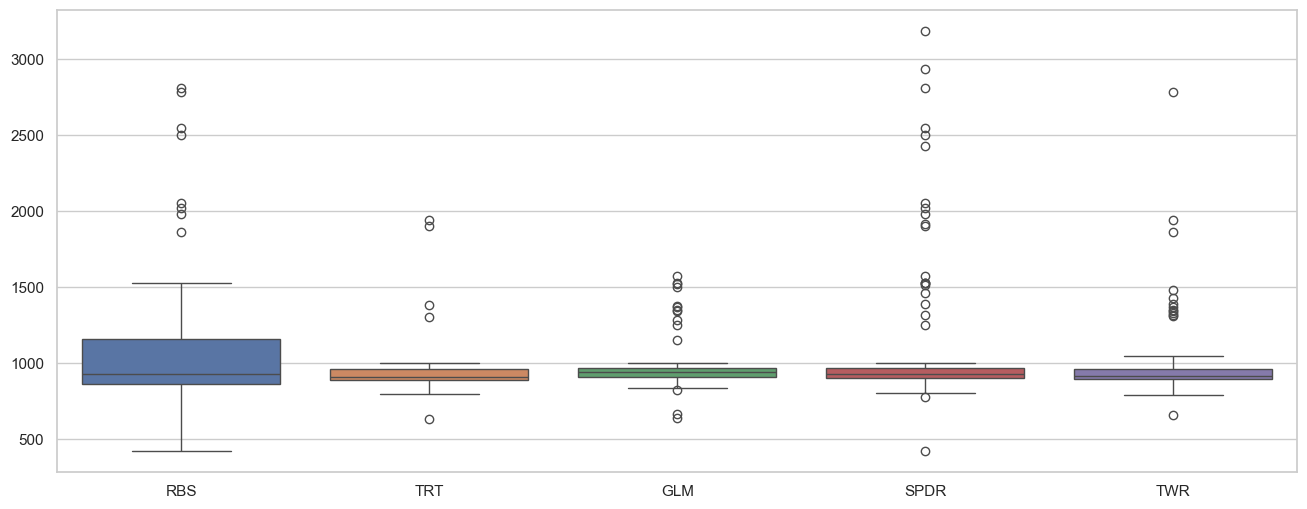

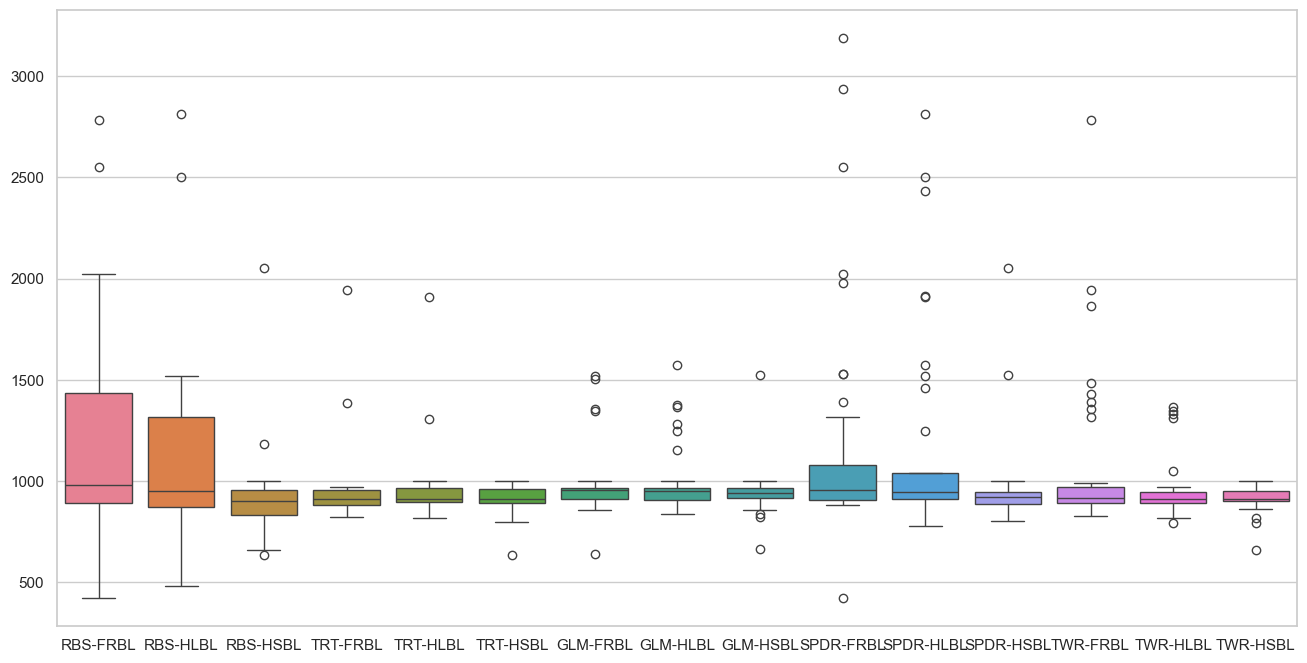

In [21]:
ranks = take_and_clean('balancerdata1', 'S-')

units_tactic = collect_scores(ranks, UNITS)

units_spells_tactic = collect_scores(ranks, UNITS,SPELLS)

spells_tactic = collect_scores(ranks, SPELLS)

path_tactic = collect_scores(ranks, PATHS)

print_score_data(units_tactic)
boxplot_score(units_tactic)
print_score_data(units_spells_tactic)
boxplot_score(units_spells_tactic, 8)
boxplot_score(path_tactic, 4)
boxplot_score(spells_tactic, 4)


